# Step-1: Data Pre-processing

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd  

In [2]:
import os

os.chdir("C:\\Users\\bhaskar\\python practice\\datasets") 

In [3]:
data_set= pd.read_csv('Salary_Data.csv')  

In [4]:
data_set

,YearsExperience,Salary
0,1.0,32383
1,1.1,45207
2,1.3,39751
3,2.0,43525
4,2.2,39891
5,2.7,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 1].values   

In [6]:
x

array([[ 1. ],
       [ 1.1],
       [ 1.3],
       [ 2. ],
       [ 2.2],
       [ 2.7],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [10.3],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 5.3],
       [ 7.9],
       [ 5.1],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [10.5],
       [ 5.8],
       [ 6. ]])

In [7]:
y

array([ 32383,  45207,  39751,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081, 122391, 116969,
       109431, 112635,  83088, 101302,  66029,  61111, 113812,  91738,
       121872,  81363,  93940], dtype=int64)

In [8]:

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  

In [9]:
x_test

array([[ 1.3],
       [10.5],
       [10.3],
       [ 9.6],
       [ 2.7],
       [ 4. ],
       [ 6.8],
       [ 4.1],
       [ 7.9]])

In [10]:
# For simple linear Regression, we will not use Feature Scaling. 
#Because Python libraries take care of it for some cases, so we don't need to perform it here. 
#Now, our dataset is well prepared to work on it.
#we are going to start building a Simple Linear Regression model for the given problem.

# Step-2: Fitting the Simple Linear Regression to the Training Set:

In [11]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step: 3. Prediction of test set result:

In [12]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

In [13]:
y_pred

array([ 37384.56268522, 129421.82618219, 127421.01610617, 120418.1808401 ,
        51390.23321737,  64395.49871151,  92406.8397758 ,  65395.90374952,
       103411.29519392])

In [14]:
y_test

array([ 39751, 121872, 122391, 112635,  56642,  55794,  91738,  57081,
       101302], dtype=int64)

# Step: 4. visualizing the Training set results:

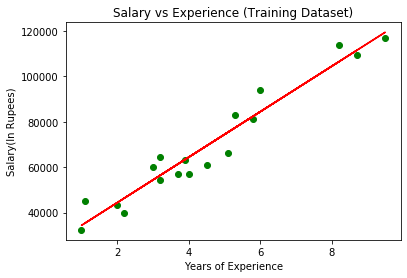

In [15]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()   

# Step: 5. visualizing the Test set results:

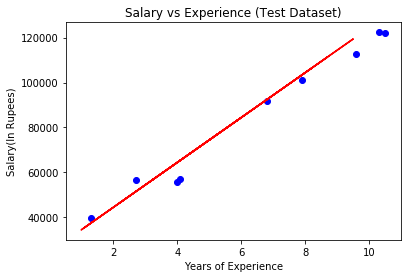

In [16]:
#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

# Step 6: Test the Performance

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
print("R^2: {}".format(regressor.score(x_test, y_test)))

R^2: 0.9610146423742099


In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 6000.738830546185


In [20]:
std = np.std(y_test)
print("Standard Deviation σ : {}".format(std))

Standard Deviation σ : 30391.627961871993


In [21]:
rmse <std # For  good model # it must be true

True

In [22]:
LinearRegression

sklearn.linear_model.base.LinearRegression

# saving the model and reload and use the model

In [23]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [24]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9610146423742099


In [25]:
result=loaded_model.predict([[2]])

In [26]:
result

array([44387.39795129])